This is a piece of code based on TeNPy following the idea in Frank Pollmann's paper about the detection of 1d SPT.

The basic idea is as follows:
 - With a given ground state (GS) $|\psi\rangle$ in `iMPS` format, and its corresponding symmetry $S$ of interest, one calculates the `sandwich` $\langle \psi | S | \psi \rangle$ as the transfer matrix $T$.
 - With the transfer matrix $T$, one calculates its primary eigenvector, which corresponds to the largest eigenvalue `1.0`, and denotes it as $U^S$.

An important issue: applying Frank's method on the unicell is not able to distinct the two SPT phases, though we did believe that they are different (a strong evidence is that under two limits, which have only X or only Y interactions respectively, the Kitaev Ladder differs inside the unicell instead of between cells).

Therefore, there might be some information we need to extract from inside one single cell; without rigorous derivation, we came up with some methods that might work:
 - Shift the tensors in a single unicell
 - Calculate the projective rep of S on different cells of size 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tenpy.networks.mps import TransferMatrix
import tenpy.linalg.np_conserved as npc

from utility import linspace

In [32]:
from kitaev_ladder_snake1 import load_data, run_atomic
from kitaev_ladder_SPT_detector import detect_SPT_D2, detect_SPT_D2_upper_Z

# Shift tensors in a single unicell

Maybe it can be solved by shift the tensors in one unicell

In [23]:
# After chechking `TeNPy` docs, we found a method in MPS called `***from Bflat`
folder_prefix = 'Spin_half_snake1_L_2_chi_64_high_res/'
# folder_prefix = 'Spin_half_snake1_L_4_chi_256_two_lines/'
Jx = 1.75
Jy = 0.25
Jz = 1.0
L = 2
chi = 64
psi = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)['psi'].copy()

In [24]:
psi.chi

[28, 36, 28, 36]

In [25]:
detect_SPT_D2(psi)

/home/jerry/Downloads/KitaevLadder/kitaev_ladder_SPT_detector.py:107: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
  return npc.inner(U12, U21.conj()) / chi


(-1.0007637007497818+0j)

In [26]:
detect_SPT_D2_upper_Z(psi)

/home/jerry/Downloads/KitaevLadder/kitaev_ladder_SPT_detector.py:175: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
  return npc.inner(U12, U21.conj()) / chi


(-1.0007634801370888+1.2688263138573217e-16j)

In [27]:
psi_shifted = psi.copy()
psi_shifted.roll_mps_unit_cell()
detect_SPT_D2_upper_Z(psi_shifted)

0

In [31]:
psi_shifted = psi.copy()
psi_shifted.roll_mps_unit_cell(shift=1)
detect_SPT_D2_upper_Z(psi_shifted)

0

## Create the conjugate point `(0.25, 1.75, 1.0)`

In [34]:
Jx = 0.25
Jy = 1.75
Jz = 1.0
L = 2
chi = 64

# psi_list = []
# result_list = []

### First of all, create the stable initial point, from smaller chi to larger chi
chi_list = [2, 4, 8, 16, 32, 64, 64, 64]

initial_psi = None
for chi in chi_list:
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
    psi = result['psi']
    initial_psi = psi.copy()
    
psi_y = psi.copy()

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  2 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True

Updating environment
.....
sweep 190, age = 2364
Energy = -0.5000000000002274, S = 0.0002827517396929, norm_err = 4.5e-06
Current memory usage 214.8 MB, time elapsed: 11.3 s
Delta E = -1.7053e-14, Delta S = -5.0656e-02 (per sweep)
max_trunc_err = 1.3914e-01, max_E_trunc = 7.7113e-01
MPS bond dimensions: [2, 2, 2, 2]
Updating environment
.....
sweep 200, age = 2484
Energy = -0.4999999999999716, S = 0.2942716457415201, norm_err = 1.9e-04
Current memory usage 215.1 MB, time elapsed: 11.8 s
Delta E = 2.5580e-14, Delta S = 2.9399e-02 (per sweep)
max_trunc_err = 1.4236e-01, max_E_trunc = 7.1046e-01
MPS bond dimensions: [2, 2, 2, 2]
norm_tol=1.00e-05 not reached, norm_err=1.93e-04
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 2524, maximum chi = 2
Before the canonicalization:
Bond dim =  [2, 2, 2, 2]
Canonicalizing...
The norm is: 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


 1.0
The overlap is:  (1.000000000000003+8.341679341830177e-17j)
After the canonicalization:
Bond dim =  [2, 2, 2, 2]
Computing properties
Optimizing
Loop for chi=2 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  4 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Readi

Updating environment
.....
sweep 180, age = 2244
Energy = -0.9220531665097269, S = 1.1298730376159849, norm_err = 2.9e-15
Current memory usage 215.1 MB, time elapsed: 14.0 s
Delta E = 2.4109e-03, Delta S = -8.3114e-03 (per sweep)
max_trunc_err = 2.8891e-03, max_E_trunc = 2.1997e-02
MPS bond dimensions: [4, 4, 4, 4]
Updating environment
.....
sweep 190, age = 2364
Energy = -0.9461235054482700, S = 1.2129594589352759, norm_err = 1.3e-15
Current memory usage 215.1 MB, time elapsed: 14.7 s
Delta E = -2.4070e-03, Delta S = 8.3086e-03 (per sweep)
max_trunc_err = 2.8913e-03, max_E_trunc = 2.2008e-02
MPS bond dimensions: [4, 4, 4, 4]
Updating environment
.....
sweep 200, age = 2484
Energy = -0.9460697891564109, S = 1.2129561482666826, norm_err = 1.2e-15
Current memory usage 215.1 MB, time elapsed: 15.5 s
Delta E = 5.3716e-06, Delta S = -3.3107e-07 (per sweep)
max_trunc_err = 2.8881e-03, max_E_trunc = 2.1992e-02
MPS bond dimensions: [4, 4, 4, 4]
DMRG finished after 200 sweeps.
total size = 2484

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9552176580937157, S = nan, norm_err = 6.9e-07
Current memory usage 216.3 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6163e-05, max_E_trunc = 3.3548e-04
MPS bond dimensions: [8, 8, 8, 8]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9552175964506233, S = nan, norm_err = 1.1e-07
Current memory usage 216.3 MB, time elapsed: 3.9 s
Delta E = 6.1643e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5801e-05, max_E_trunc = 3.3504e-04
MPS bond dimensions: [8, 8, 8, 8]
Convergence criterium reached with enabled 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586446852223460, S = nan, norm_err = 1.1e-07
Current memory usage 216.3 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8178e-07, max_E_trunc = 2.4099e-06
MPS bond dimensions: [16, 16, 16, 16]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586446844651419, S = nan, norm_err = 1.8e-08
Current memory usage 216.3 MB, time elapsed: 5.0 s
Delta E = 7.5720e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3161e-07, max_E_trunc = 2.3937e-06
MPS bond dimensions: [16, 16, 16, 16]
Convergence criterium reached with e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586464333186200, S = nan, norm_err = 1.5e-11
Current memory usage 217.9 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6547e-17, max_E_trunc = 2.5580e-13
MPS bond dimensions: [52, 60, 35, 62]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586464333186271, S = nan, norm_err = 6.7e-13
Current memory usage 217.9 MB, time elapsed: 7.0 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4650e-18, max_E_trunc = 1.7053e-13
MPS bond dimensions: [49, 61, 36, 59]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586464333186875, S = nan, norm_err = 1.5e-11
Current memory usage 218.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7330e-17, max_E_trunc = -2.8422e-14
MPS bond dimensions: [55, 59, 36, 60]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586464333185987, S = nan, norm_err = 9.1e-13
Current memory usage 218.1 MB, time elapsed: 6.9 s
Delta E = 8.8818e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4854e-18, max_E_trunc = 2.8422e-13
MPS bond dimensions: [52, 59, 35, 58]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586464333186058, S = nan, norm_err = 1.4e-11
Current memory usage 218.1 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5465e-17, max_E_trunc = 2.5580e-13
MPS bond dimensions: [53, 60, 36, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586464333186271, S = nan, norm_err = 2.0e-12
Current memory usage 218.1 MB, time elapsed: 7.5 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9291e-18, max_E_trunc = 1.7053e-13
MPS bond dimensions: [48, 59, 34, 58]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


In [36]:
detect_SPT_D2_upper_Z(psi_y)

/home/jerry/Downloads/KitaevLadder/kitaev_ladder_SPT_detector.py:175: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
  return npc.inner(U12, U21.conj()) / chi


(-1.0006505263429353+6.344131569286608e-17j)

In [37]:
psi_shifted = psi_y.copy()
psi_shifted.roll_mps_unit_cell()
detect_SPT_D2_upper_Z(psi_shifted)

0

So this method doesn't work...

# Construct 2-site `iMPS` from 4-site

In [47]:
from tenpy.networks.site import SpinHalfSite

In [95]:
# After chechking `TeNPy` docs, we found a method in MPS called `***from Bflat`
folder_prefix = 'Spin_half_snake1_L_2_chi_64_high_res/'
# folder_prefix = 'Spin_half_snake1_L_4_chi_256_two_lines/'
Jx = 1.75
Jy = 0.25
Jz = 1.0
L = 2
chi = 64
psi = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)['psi'].copy()

In [53]:
psi.get_B(0)

<npc.Array shape=(28, 2, 36) charge=ChargeInfo([], []) labels=['vL', 'p', 'vR']>

In [57]:
B0 = psi.get_B(0)
B0.

AttributeError: 'Array' object has no attribute 'to'

In [41]:
psi.get_B(1)

<npc.Array shape=(36, 2, 28) charge=ChargeInfo([], []) labels=['vL', 'p', 'vR']>

In [43]:
psi.get_SL(0)

array([7.05261670e-01, 7.05261670e-01, 5.09148755e-02, 5.09148755e-02,
       3.67569182e-03, 3.67569182e-03, 2.65358802e-04, 2.65358802e-04,
       2.65358801e-04, 2.65358801e-04, 1.91570202e-05, 1.91570202e-05,
       1.91570178e-05, 1.91570178e-05, 1.38304002e-06, 1.38303616e-06,
       1.38300030e-06, 1.38300029e-06, 1.38300024e-06, 1.38299998e-06,
       1.00596405e-07, 1.00289973e-07, 9.99848252e-08, 9.98490710e-08,
       9.98444616e-08, 9.98437754e-08, 9.98414347e-08, 9.98376431e-08])

In [44]:
psi.get_SR(0)

array([6.93610040e-01, 6.93610040e-01, 1.37398692e-01, 1.37398692e-01,
       3.68287520e-03, 3.68287520e-03, 3.48272048e-03, 3.48272048e-03,
       7.29548605e-04, 7.29548605e-04, 6.89899528e-04, 6.89899528e-04,
       9.68804050e-05, 9.68804045e-05, 1.91912451e-05, 1.91912446e-05,
       1.84922702e-05, 1.84922693e-05, 3.80065306e-06, 3.80064961e-06,
       3.66317261e-06, 3.66317214e-06, 7.52866963e-07, 7.52858756e-07,
       5.14370116e-07, 5.14369194e-07, 4.86413359e-07, 4.86413351e-07,
       1.04254069e-07, 1.03583867e-07, 1.02357711e-07, 1.01756352e-07,
       9.63025087e-08, 9.62795022e-08, 8.76487046e-08, 8.75791862e-08])

In [45]:
psi.get_SL(1)

array([6.93610040e-01, 6.93610040e-01, 1.37398692e-01, 1.37398692e-01,
       3.68287520e-03, 3.68287520e-03, 3.48272048e-03, 3.48272048e-03,
       7.29548605e-04, 7.29548605e-04, 6.89899528e-04, 6.89899528e-04,
       9.68804050e-05, 9.68804045e-05, 1.91912451e-05, 1.91912446e-05,
       1.84922702e-05, 1.84922693e-05, 3.80065306e-06, 3.80064961e-06,
       3.66317261e-06, 3.66317214e-06, 7.52866963e-07, 7.52858756e-07,
       5.14370116e-07, 5.14369194e-07, 4.86413359e-07, 4.86413351e-07,
       1.04254069e-07, 1.03583867e-07, 1.02357711e-07, 1.01756352e-07,
       9.63025087e-08, 9.62795022e-08, 8.76487046e-08, 8.75791862e-08])

In [46]:
psi.get_SR(1)

array([7.05261670e-01, 7.05261670e-01, 5.09148755e-02, 5.09148755e-02,
       3.67569182e-03, 3.67569182e-03, 2.65358802e-04, 2.65358802e-04,
       2.65358801e-04, 2.65358801e-04, 1.91570175e-05, 1.91570172e-05,
       1.91570158e-05, 1.91570131e-05, 1.38299169e-06, 1.38296237e-06,
       1.38295907e-06, 1.38294268e-06, 1.38289068e-06, 1.38282660e-06,
       9.98077678e-08, 9.94304041e-08, 9.93833828e-08, 9.89792271e-08,
       9.82119183e-08, 9.80758754e-08, 9.80658167e-08, 9.76245141e-08])

In [72]:
# test if we can manually construct the same iMPS
sites = [SpinHalfSite(),SpinHalfSite(),SpinHalfSite(),SpinHalfSite(),]

# Bflat = [psi.get_B(i).to_ndarray() for i in range(4)]
# Bflat = [np.swapaxes(B, 0, 1) for B in Bflat]
SVs = [psi.get_SL(0), psi.get_SL(1), psi.get_SL(2), psi.get_SL(3), psi.get_SL(4), ]
bc = 'infinite'

psi_test = psi.from_product_state(
    sites,
    ['up' for site in sites],
    bc=bc,
)
for i in range(psi_test.L):
    psi_test.set_B(i, psi.get_B(i))
    psi_test.set_SL(i, psi.get_SL(i))
    psi_test.set_SR(i, psi.get_SR(i))
# psi_test = (psi.from_Bflat(sites, Bflat, SVs=SVs, bc=bc))
# psi_test.canonical_form('B')

In [73]:
psi.overlap(psi_test)

(0.9999999999999996-7.166929519520123e-17j)

OK finally it works.

In [100]:
# test if we can manually construct the same iMPS
sites = [SpinHalfSite(conserve=None),SpinHalfSite(conserve=None),]

# Bflat = [psi.get_B(i).to_ndarray() for i in range(4)]
# Bflat = [np.swapaxes(B, 0, 1) for B in Bflat]
# SVs = [psi.get_SL(0), psi.get_SL(1), psi.get_SL(2), psi.get_SL(3), psi.get_SL(4), ]
bc = 'infinite'

psi_test = psi.from_product_state(
    sites,
    ['up' for site in sites],
    bc=bc,
)
for i in range(psi_test.L):
    psi_test.set_B(i, psi.get_B(i))
    psi_test.set_SL(i, psi.get_SL(i))
    psi_test.set_SR(i, psi.get_SR(i))
# psi_test = (psi.from_Bflat(sites, Bflat, SVs=SVs, bc=bc))
# psi_test.canonical_form('B')

In [102]:
psi_test.overlap(psi_test)

(0.9999999999999969-1.1294531792586897e-16j)

In [104]:
psi_test.L

2

.................

In [120]:
def detect_SPT_D2_upper_Z_2site(psi):
    
#     op_list = ['Sigmax', 'Sigmay']
    U_list = []
    
    op = 'Sigmaz'

    s = SpinHalfSite(conserve=None)
    op = npc.expm(1.j * (np.pi/2) * s.get_op(op))
    
    
    ###### The upper ######
    # First of all, save a copy of the input wavefunction psi
    psi_copy = psi.copy()
    
    # Then calculate the specific properties of the wavefunction
    psi_copy.apply_local_op(0, op)
    
    TM = TransferMatrix(psi, psi_copy)
    eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
#     if not np.allclose(np.abs(eta), 1, atol=0.01):
#         print('Largest Eig Wrong: Eta0 = ', eta)
#         return 0
    
    
    U = G[0]
    Uop = U.split_legs()
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    U_list.append(Uop)

    ###### The lower ######
    # First of all, save a copy of the input wavefunction psi
    psi_copy = psi.copy()
    
    # Then calculate the specific properties of the wavefunction
    psi_copy.apply_local_op(1, op)

    TM = TransferMatrix(psi, psi_copy)
    eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
#     if not np.allclose(np.abs(eta), 1, atol=0.01):
#         print('Largest Eig Wrong: Eta0 = ', eta)

#         return 0
    
    
    U = G[0]
    Uop = U.split_legs()
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    U_list.append(Uop)
        
    
    U1 = U_list[0]
    U2 = U_list[1]
    U12 = npc.tensordot(U1, U2, axes=([1], [0]))
    U21 = npc.tensordot(U2, U1, axes=([1], [0]))
    return npc.inner(U12, U21.conj()) / chi

In [121]:
detect_SPT_D2_upper_Z_2site(psi_test)

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


(-0.19051409302212197-0.014300434075953198j)

In [107]:
psi_test2 = psi_test.copy()

In [109]:
psi_test2.swap_sites(0)

Reading 'chi_max'=36 for config truncation


TruncationError(eps=2.6982e-15, ov=1.0000000000)

In [122]:
detect_SPT_D2_upper_Z_2site(psi_test2)

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


(-0.19636743769016268-0.012440621462437833j)

Sadly...

In [114]:
psi_copy = psi_test.copy()
psi_copy.apply_local_op(0, 'Sigmaz')

In [118]:
TM = TransferMatrix(psi_test, psi_copy)
TM.eigenvectors(num_ev=2)

(array([-0.06469118-0.65090731j, -0.06469118+0.65090731j]),
 [<npc.Array shape=(784,) charge=ChargeInfo([], []) labels=['(vL.vL*)']>,
  <npc.Array shape=(784,) charge=ChargeInfo([], []) labels=['(vL.vL*)']>])

In [88]:
# test if we can manually construct the same iMPS
sites = [SpinHalfSite(),SpinHalfSite(),SpinHalfSite(),SpinHalfSite(),]

Bflat = [psi.get_B(i).to_ndarray() for i in range(4)]
Bflat = [np.swapaxes(B, 0, 1) for B in Bflat]
SVs = [psi.get_SL(0), psi.get_SL(1), psi.get_SL(2), psi.get_SL(3), psi.get_SL(4), ]
bc = 'infinite'

psi_test = psi.from_Bflat(
    sites,
    Bflat,
    bc=bc,
    permute=False,
)
for i in range(psi_test.L):
    psi_test.set_B(i, psi.get_B(i))
    psi_test.set_SL(i, psi.get_SL(i))
    psi_test.set_SR(i, psi.get_SR(i))
# psi_test = (psi.from_Bflat(sites, Bflat, SVs=SVs, bc=bc))
# psi_test.canonical_form('B')

In [92]:
detect_SPT_D2_upper_Z(psi)

/home/jerry/Downloads/KitaevLadder/kitaev_ladder_SPT_detector.py:175: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
  return npc.inner(U12, U21.conj()) / chi


(-1.0007634801370882-1.2688263138573217e-16j)

.... Let's simulate 2-site directly

In [93]:
Jx = 0.25
Jy = 1.75
Jz = 1.0
L = 1
chi = 64

# psi_list = []
# result_list = []

### First of all, create the stable initial point, from smaller chi to larger chi
chi_list = [2, 4, 8, 16, 32, 64, 64, 64]

initial_psi = None
for chi in chi_list:
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
    psi = result['psi']
    initial_psi = psi.copy()
    
psi_y = psi.copy()

Reading 'L'=1 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  2 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 200
Energy = -0.7687577464043063, S = nan, norm_err = 2.0e-15
Current memory usage 249.1 MB, time elapsed: 0.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4994e-02, max_E_trunc = 1.7867e-01
MPS bond dimensions: [4, 4]
Updating environment
.....
sweep 20, age = 320
Energy = -0.7687739350417928, S = nan, norm_err = 3.9e-15
Current memory usage 249.1 MB, time elapsed: 1.8 s
Delta E = -1.6189e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4976e-02, max_E_trunc = 1.7867e-01
MPS bond dimensions: [4, 4]
Updating environment
.....
sweep 30, age = 440
Energy = -0.7

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2328: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 200
Energy = -0.9586446701425828, S = nan, norm_err = 3.0e-04
Current memory usage 249.1 MB, time elapsed: 1.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2992e-07, max_E_trunc = 1.8633e-06
MPS bond dimensions: [8, 8]
Updating environment
.....
sweep 20, age = 320
Energy = -0.9586446964717368, S = nan, norm_err = 8.2e-08
Current memory usage 249.1 MB, time elapsed: 2.2 s
Delta E = -2.6329e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3847e-07, max_E_trunc = 2.4139e-06
MPS bond dimensions: [8, 8]
Convergence criterium reached with enabled mixer.
disable

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 200
Energy = -0.9586464275067428, S = nan, norm_err = 8.8e-11
Current memory usage 249.1 MB, time elapsed: 1.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0963e-09, max_E_trunc = 1.2652e-08
MPS bond dimensions: [16, 16]
Updating environment
.....
sweep 20, age = 320
Energy = -0.9586464277999696, S = nan, norm_err = 1.9e-11
Current memory usage 249.1 MB, time elapsed: 2.7 s
Delta E = -2.9323e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8475e-09, max_E_trunc = 1.0347e-08
MPS bond dimensions: [16, 16]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 440
Energy = -0.9586464308601848, S = 1.0590219964572485, norm_err = 2.8e-12
Current memory usage 249.1 MB, time elapsed: 3.2 s
Delta E = -3.0602e-10, Delta S = nan (per sweep)
max_trunc_err = 1.8286e-10, max_E_trunc = 1.4039e-09
MPS bond dimensions: [16, 16]
Updating environment
.....
sweep 40, a

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 200
Energy = -0.9586464333186804, S = nan, norm_err = 8.2e-12
Current memory usage 249.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4354e-17, max_E_trunc = 1.1369e-13
MPS bond dimensions: [52, 60]
Updating environment
.....
sweep 20, age = 320
Energy = -0.9586464333186697, S = nan, norm_err = 7.1e-13
Current memory usage 249.1 MB, time elapsed: 4.7 s
Delta E = 1.0658e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0594e-18, max_E_trunc = 2.2737e-13
MPS bond dimensions: [48, 59]
Convergence criterium reached with enabled mixe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 200
Energy = -0.9586464333186626, S = nan, norm_err = 2.4e-09
Current memory usage 249.5 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7836e-17, max_E_trunc = -2.8422e-14
MPS bond dimensions: [52, 57]
Updating environment
.....
sweep 20, age = 320
Energy = -0.9586464333185631, S = nan, norm_err = 7.4e-13
Current memory usage 250.2 MB, time elapsed: 4.6 s
Delta E = 9.9476e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3982e-18, max_E_trunc = 0.0000e+00
MPS bond dimensions: [47, 58]
Convergence criterium reached with enabled mixe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
DMRG finished after 40 sweeps.
total size = 600, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+6.620556425117169e-16j)
After the canonicalization:
Bond dim =  [64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=1 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'tru

Updating environment
.....
sweep 170, age = 2120
Energy = -0.9576910766252240, S = 1.0616450718450778, norm_err = 1.2e-04
Current memory usage 251.2 MB, time elapsed: 60.0 s
Delta E = -1.9976e-01, Delta S = -1.7829e-01 (per sweep)
max_trunc_err = 1.1280e-09, max_E_trunc = -3.1263e-08
MPS bond dimensions: [64, 64]
Updating environment
.....
sweep 180, age = 2240
Energy = -0.9544379580052009, S = 0.8364862117455816, norm_err = 1.3e-04
Current memory usage 251.2 MB, time elapsed: 63.3 s
Delta E = 3.2531e-04, Delta S = -2.2516e-02 (per sweep)
max_trunc_err = 5.0225e-07, max_E_trunc = -2.2688e-06
MPS bond dimensions: [64, 64]
Updating environment
.....
sweep 190, age = 2360
Energy = -0.9586288168098349, S = 1.0588159675803115, norm_err = 4.1e-05
Current memory usage 251.2 MB, time elapsed: 66.6 s
Delta E = -4.1909e-04, Delta S = 2.2233e-02 (per sweep)
max_trunc_err = 1.0706e-10, max_E_trunc = -1.3279e-10
MPS bond dimensions: [64, 64]
Updating environment
.....
sweep 200, age = 2480
Energy =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 2560, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987+1.7498178677946747e-18j)
After the canonicalization:
Bond dim =  [64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================


Basically Impossible...

# Functions for calculating the SPT signatures

In [94]:
def detect_SPT_onsite(psi, symmetry):
    assert symmetry in ['Sigmax', 'Sigmay', 'upperSigmaz', 'lowerSigmaz']
    if symmetry=='Sigmax' or symmetry=='Sigmay':
        op = symmetry
        # First of all, save a copy of the input wavefunction psi
        psi_copy = psi.copy()
        for i in range(psi_copy.L): # apply the op to all sites
            psi_copy.apply_local_op(i, op)
        
        TM = TransferMatrix(psi, psi_copy)
        eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
        if not np.allclose(np.abs(eta), 1, atol=0.01):
            return 0
        
        U = G[0]
        Uop = U.split_legs()
        chi=(Uop.shape[0])
        Uop *= np.sqrt(chi) # rescale it
        
    else: # if the symmetry is the upper or the lower Sigmaz
        op = 'Sigmaz'
        # First of all, save a copy of the input wavefunction psi
        psi_copy = psi.copy()
        # Then calculate the specific properties of the wavefunction
        N = psi_copy.L // 4 # The number of unicells
        
        if symmetry == 'upperSigmaz':
            for i in range(N):
                psi_copy.apply_local_op(2*i, op)
                psi_copy.apply_local_op(2*i+3, op)
        else:
            for i in range(N):
                psi_copy.apply_local_op(2*i+1, op)
                psi_copy.apply_local_op(2*i+2, op)
            
        
        TM = TransferMatrix(psi, psi_copy)
        eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
        if not np.allclose(np.abs(eta), 1, atol=0.01):
            return 0
        
        U = G[0]
        Uop = U.split_legs()
        chi=(Uop.shape[0])
        Uop *= np.sqrt(chi) # rescale it
        
    return Uop, chi
        

In [90]:
def detect_SPT_D2(psi):
    
    op_list = ['Sigmax', 'Sigmay']
    U_list = []
    
    for op in op_list:
        # First of all, save a copy of the input wavefunction psi
        psi_copy = psi.copy()
        for i in range(psi_copy.L):
            psi_copy.apply_local_op(i, op)
        
        TM = TransferMatrix(psi, psi_copy)
        eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
        if not np.allclose(np.abs(eta), 1, atol=0.01):
            return 0
        
        U = G[0]
        Uop = U.split_legs()
        chi=(Uop.shape[0])
        Uop *= np.sqrt(chi) # rescale it
        U_list.append(Uop)

    U1 = U_list[0]
    U2 = U_list[1]
    U12 = npc.tensordot(U1, U2, axes=([1], [0]))
    U21 = npc.tensordot(U2, U1, axes=([1], [0]))
    return npc.inner(U12, U21.conj()) / chi
#     print(npc.inner(U12, U21.conj()) / chi)

In [3]:
def detect_SPT_D2_upper_Z(psi):
    
#     op_list = ['Sigmax', 'Sigmay']
    U_list = []
    
    op = 'Sigmaz'
    
    
    ###### The upper ######
    # First of all, save a copy of the input wavefunction psi
    psi_copy = psi.copy()
    
    # Then calculate the specific properties of the wavefunction
    N = psi_copy.L // 4 # The number of unicells
    for i in range(N):
        psi_copy.apply_local_op(2*i, op)
        psi_copy.apply_local_op(2*i+3, op)

    TM = TransferMatrix(psi, psi_copy)
    eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
    if not np.allclose(np.abs(eta), 1, atol=0.01):
        return 0
    
    
    U = G[0]
    Uop = U.split_legs()
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    U_list.append(Uop)

    ###### The lower ######
    # First of all, save a copy of the input wavefunction psi
    psi_copy = psi.copy()
    
    # Then calculate the specific properties of the wavefunction
    N = psi_copy.L // 4 # The number of unicells
    for i in range(N): # apply the operators
        psi_copy.apply_local_op(2*i+1, op)
        psi_copy.apply_local_op(2*i+2, op)

    TM = TransferMatrix(psi, psi_copy)
    eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
    if not np.allclose(np.abs(eta), 1, atol=0.01):
        return 0
    
    
    U = G[0]
    Uop = U.split_legs()
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    U_list.append(Uop)
        
    
    U1 = U_list[0]
    U2 = U_list[1]
    U12 = npc.tensordot(U1, U2, axes=([1], [0]))
    U21 = npc.tensordot(U2, U1, axes=([1], [0]))
    return npc.inner(U12, U21.conj()) / chi

In [71]:
def detect_SPT_spatial_inv(psi, Op='inversion'):
    
    # create a copy of the wavefunction in form B. Only for a gaurantee. It should be of form B by defaultcalcu
    psi_copy = psi.copy()
    psi_copy.convert_form('B')
    
    if Op=='inversion': # apply the spatial inversion op to the wavefunction
        psi_inv = psi_copy.spatial_inversion() #Form spatial reflection of the WF
    elif Op=='time_reversal': # apply the time reversal op to the wavefunction
        psi_inv = psi_copy.copy()
        for i in range(psi_inv.L):
            t=psi_inv.get_B(i).copy()
            
            for array in t:
                array_list = list(array)
                array_list[0] = np.conj(array_list[0])
                array = tuple(array_list)
            psi_inv.set_B(i, t)
    
    # create the transfer matrix corresponding to the original wavefunction and the tranformed wavefunction
    TM = TransferMatrix(psi_inv, psi_copy)
    
    # calculate the largest eigenvalue and the corresponding eigenvector
    eta, G = TM.eigenvectors(num_ev=1)

    # if eta, i.e. the largest eigenvalue is not 1 (not close enough to 1)
    if not np.allclose(np.abs(eta), 1, atol=0.01):
        print("Not Symmetric under the Spatial Inversion. Eta = ", eta)
        return 0
    
    U = G[0]
    Uop = U.split_legs() # this is necessary for TeNPy, or we cannot get the matrix but a vector
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    return npc.inner(U, U.conj())

In [2]:
from kitaev_ladder_snake1 import load_data, run_atomic

In [3]:
import re
import os
import h5py
from tenpy.tools import hdf5_io

In [12]:
string = 'KitaevLadder_chi_256_Jx_0.07_Jy_0.07_Jz_1.0_L_4.h5'
pattern = r"[-+]?\d*\.\d+|\d+"
re.findall(pattern, string)

['256', '0.07', '0.07', '1.0', '4', '5']

# Get the iMPS' for the diagram line of our interest

In [4]:
# This is the dictionary for storing the wave functions (iMPS)
psi_dict = {}

In [7]:
num = 101
Jx_list = linspace(1.0, 2.0, num)

# The initial parameters
Jx = 1.75
Jy = 0.25
Jz = 1.0
L = 2
chi = 128

# psi_list = []
# result_list = []

# The chi list for initial several steps
chi_list = [4, 8, 16, 32, 64, 128]

initial_psi = None
for chi in chi_list:
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
    psi = result['psi']
    initial_psi = psi.copy()

# # right noew the chi should be already 128
# psi_dict[(Jx, Jy, Jz)] = psi.copy()
# psi_111 = psi.copy()


# initial_psi = psi_111.copy()
# for Jx in Jx_list[1:]:
#     Jy = np.round(2 - Jx, decimals=2)
#     result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
#     psi = result['psi'].copy()
#     psi_dict[(Jx, Jy, Jz)] = psi.copy()
#     initial_psi = psi.copy()
    
# initial_psi = psi_111.copy()
# for Jx in Jx_list[1:]:
#     Jx = np.round(2 - Jx, decimals=2)
#     Jy = np.round(2 - Jx, decimals=2)
#     result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
#     psi = result['psi'].copy()
#     psi_dict[(Jx, Jy, Jz)] = psi.copy()
#     initial_psi = psi.copy()

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  4 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586363469936572, S = nan, norm_err = 1.2e-07
Current memory usage 194.3 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5697e-06, max_E_trunc = 1.6873e-05
MPS bond dimensions: [8, 8, 8, 8]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586363892441909, S = nan, norm_err = 1.6e-08
Current memory usage 194.3 MB, time elapsed: 3.7 s
Delta E = -4.2251e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4744e-06, max_E_trunc = 1.6874e-05
MPS bond dimensions: [8, 8, 8, 8]
Convergence criterium reached with enabled

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586462705763807, S = nan, norm_err = 1.1e-08
Current memory usage 194.3 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6679e-09, max_E_trunc = 1.6935e-08
MPS bond dimensions: [16, 16, 16, 16]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586464289911802, S = nan, norm_err = 3.3e-09
Current memory usage 194.3 MB, time elapsed: 4.8 s
Delta E = -1.5841e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2065e-09, max_E_trunc = 6.5277e-09
MPS bond dimensions: [16, 16, 16, 16]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586464333186910, S = nan, norm_err = 6.9e-12
Current memory usage 194.3 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6076e-18, max_E_trunc = 8.5265e-14
MPS bond dimensions: [53, 58, 37, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586464333186200, S = nan, norm_err = 1.3e-12
Current memory usage 194.3 MB, time elapsed: 7.4 s
Delta E = 7.1054e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3254e-18, max_E_trunc = 3.9790e-13
MPS bond dimensions: [48, 57, 34, 57]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586464333187088, S = nan, norm_err = 7.0e-12
Current memory usage 194.3 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1597e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [52, 59, 33, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586464333187479, S = nan, norm_err = 2.7e-13
Current memory usage 194.3 MB, time elapsed: 9.0 s
Delta E = -3.9080e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4026e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [48, 56, 35, 60]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


In [6]:
num = 101
Jx_list = linspace(1.0, 2.0, num)

# The initial parameters
Jx = 1.75
Jy = 0.25
Jz = 1.0
L = 1
chi = 128

# psi_list = []
# result_list = []

# The chi list for initial several steps
chi_list = [4, 8, 16, 32, 64, 128]

initial_psi = None
for chi in chi_list:
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
    psi = result['psi']
    initial_psi = psi.copy()

# # right noew the chi should be already 128
# psi_dict[(Jx, Jy, Jz)] = psi.copy()
# psi_111 = psi.copy()


# initial_psi = psi_111.copy()
# for Jx in Jx_list[1:]:
#     Jy = np.round(2 - Jx, decimals=2)
#     result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
#     psi = result['psi'].copy()
#     psi_dict[(Jx, Jy, Jz)] = psi.copy()
#     initial_psi = psi.copy()
    
# initial_psi = psi_111.copy()
# for Jx in Jx_list[1:]:
#     Jx = np.round(2 - Jx, decimals=2)
#     Jy = np.round(2 - Jx, decimals=2)
#     result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
#     psi = result['psi'].copy()
#     psi_dict[(Jx, Jy, Jz)] = psi.copy()
#     initial_psi = psi.copy()

Reading 'L'=1 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  4 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


.
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 200
Energy = -0.9586362035032607, S = nan, norm_err = 9.5e-08
Current memory usage 145.9 MB, time elapsed: 1.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5696e-06, max_E_trunc = 1.6873e-05
MPS bond dimensions: [8, 8]
Updating environment
.....
sweep 20, age = 320
Energy = -0.9586362516180813, S = nan, norm_err = 1.4e-08
Current memory usage 145.9 MB, time elapsed: 2.1 s
Delta E = -4.8115e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4744e-06, max_E_trunc = 1.6874e-05
MPS bond dimensions: [8, 8]
Convergence criterium reached with enabled mixer.
disable 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Updating environment
.....
sweep 10, age = 200
Energy = -0.9586461706083540, S = nan, norm_err = 2.5e-08
Current memory usage 145.9 MB, time elapsed: 1.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6671e-09, max_E_trunc = 1.6896e-08
MPS bond dimensions: [16, 16]
Updating environment
.....
sweep 20, age = 320
Energy = -0.9586464287517913, S = nan, norm_err = 2.2e-09
Current memory usage 145.9 MB, time elapsed: 2.8 s
Delta E = -2.5814e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2077e-09, max_E_trunc = 6.5331e-09
MPS bond dimensions: [16, 16]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 440
Energy = -0.9586464297450448, S = 0.7902163783047904, norm_err = 1.1e-10
Current memory usage 145.9 MB, time elapsed: 3.3 s
Delta E = -9.9325e-11, Delta S = nan (per sweep)
max_trunc_err = 5.3998e-10, max_E_trunc = 6.5078e-09
MPS bond dimensions: [16, 16]
Updating environment
.....
sweep 40, a

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 200
Energy = -0.9586464333186200, S = nan, norm_err = 4.6e-12
Current memory usage 151.4 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4789e-18, max_E_trunc = 5.6843e-14
MPS bond dimensions: [50, 58]
Updating environment
.....
sweep 20, age = 320
Energy = -0.9586464333187337, S = nan, norm_err = 3.1e-13
Current memory usage 151.7 MB, time elapsed: 4.0 s
Delta E = -1.1369e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2406e-18, max_E_trunc = 1.1369e-13
MPS bond dimensions: [47, 58]
Convergence criterium reached with enabled mixer.

norm_tol=1.00e-05 not reached, norm_err=1.61e-02
Updating environment
....

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 2560, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-2.2572844468404948e-17j)
After the canonicalization:
Bond dim =  [64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=1 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_p

Updating environment
.....
sweep 170, age = 2120
Energy = 0.8638618577197690, S = 3.5121659085735812, norm_err = 6.8e-02
Current memory usage 194.3 MB, time elapsed: 163.8 s
Delta E = 8.8453e-02, Delta S = -3.4096e-05 (per sweep)
max_trunc_err = 6.5654e-09, max_E_trunc = -2.1401e-07
MPS bond dimensions: [128, 128]
norm_tol=1.00e-05 not reached, norm_err=6.76e-02
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
DMRG finished after 170 sweeps.
total size = 2200, maximum chi = 128
Before the canonicalization:
Bond dim =  [128, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-1.3407755990493245e-16j)
After the canonicalization:
Bond dim =  [128, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================


It's very unstable.

I believe it will be better to use `L=2`.

# SPT Detectors of `X` and `Y`

In [11]:
Jx_list = linspace(0, 2.0, 201)
J_list = [(Jx, np.round(2-Jx, decimals=2), 1.0) for Jx in Jx_list]
    
detector_list = [np.real(detect_SPT_D2(psi_dict[J])) for J in J_list]

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

Text(0.5, 1.0, 'SPT Detector on the line $J_x + J_y = 2 J_z$')

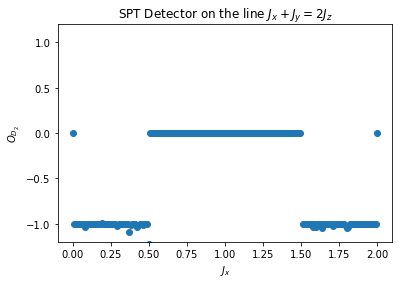

In [13]:
plt.plot(Jx_list, detector_list, 'o')
plt.ylim(-1.2, 1.2)
plt.xlabel(r'$J_x$')
plt.ylabel(r'$O_{D_2}$')
plt.title(r'SPT Detector on the line $J_x + J_y = 2 J_z$')

In [14]:
psi1 = psi_dict[(1.75, 0.25, 1.0)].copy()
psi2 = psi_dict[(0.25, 1.75, 1.0)].copy()
for i in range(psi.L):
    psi1.apply_local_op(i, 'Sigmaz')
psi2.overlap(psi1)

(0.009434093784261632+0.6792746084614397j)

# SPT Detectors of upper `Z` and lower `Z`

In [43]:
Jx_list = linspace(0, 2.0, 201)
J_list = [(Jx, np.round(2-Jx, decimals=2), 1.0) for Jx in Jx_list]
    
detector_list_upper_lower_Z = [np.real(detect_SPT_D2_upper_Z(psi_dict[J])) for J in J_list]

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

Text(0.5, 1.0, 'SPT Detector on the line $J_x + J_y = 2 J_z, Z_{upper, lower}$')

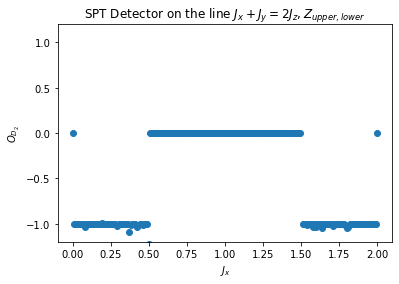

In [44]:
plt.plot(Jx_list, detector_list_upper_lower_Z, 'o')
plt.ylim(-1.2, 1.2)
plt.xlabel(r'$J_x$')
plt.ylabel(r'$O_{D_2}$')
plt.title(r'SPT Detector on the line $J_x + J_y = 2 J_z, Z_{upper, lower}$')

In [95]:
Jx_list = linspace(0, 2.0, 201)
J_list = [(Jx, np.round(2-Jx, decimals=2), 1.0) for Jx in Jx_list]
psi_list = [psi_dict[J].copy() for J in J_list]
    
sym_list = ['Sigmax', 'Sigmay', 'upperSigmaz', 'lowerSigmaz']
sym_U_dict = {}
for sym in sym_list:
    sym_U_dict[sym] = [detect_SPT_onsite(psi, sym) for psi in psi_list]

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


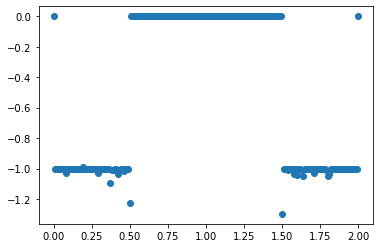

In [104]:
sym1 = 'Sigmax'
sym2 = 'Sigmay'

sym_list_1 = sym_U_dict[sym1]
sym_list_2 = sym_U_dict[sym2]

commutator_list = []
for J in range(len(J_list)):
    if sym_list_1[J] == 0 or sym_list_2[J] == 0:
        commutator_list.append(0)
    else:
#         print(sym_list_1[J])
        chi = sym_list_1[J][1]
        U1 = sym_list_1[J][0]
        U2 = sym_list_2[J][0]
        U12 = npc.tensordot(U1, U2, axes=([1], [0]))
        U21 = npc.tensordot(U2, U1, axes=([1], [0]))
        commutator_list.append(npc.inner(U12, U21.conj()) / chi)
plt.plot(Jx_list, commutator_list, 'o')

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


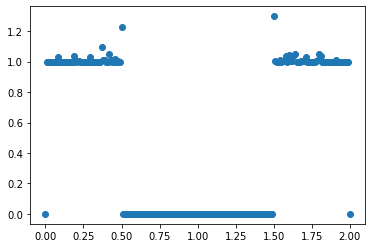

In [105]:
sym1 = 'Sigmax'
sym2 = 'lowerSigmaz'

sym_list_1 = sym_U_dict[sym1]
sym_list_2 = sym_U_dict[sym2]

commutator_list = []
for J in range(len(J_list)):
    if sym_list_1[J] == 0 or sym_list_2[J] == 0:
        commutator_list.append(0)
    else:
#         print(sym_list_1[J])
        chi = sym_list_1[J][1]
        U1 = sym_list_1[J][0]
        U2 = sym_list_2[J][0]
        U12 = npc.tensordot(U1, U2, axes=([1], [0]))
        U21 = npc.tensordot(U2, U1, axes=([1], [0]))
        commutator_list.append(npc.inner(U12, U21.conj()) / chi)
plt.plot(Jx_list, commutator_list, 'o')

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


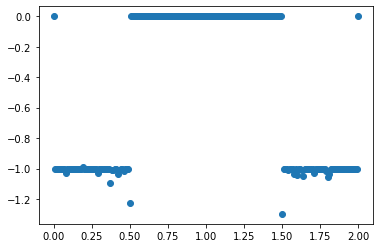

In [106]:
sym1 = 'upperSigmaz'
sym2 = 'lowerSigmaz'

sym_list_1 = sym_U_dict[sym1]
sym_list_2 = sym_U_dict[sym2]

commutator_list = []
for J in range(len(J_list)):
    if sym_list_1[J] == 0 or sym_list_2[J] == 0:
        commutator_list.append(0)
    else:
#         print(sym_list_1[J])
        chi = sym_list_1[J][1]
        U1 = sym_list_1[J][0]
        U2 = sym_list_2[J][0]
        U12 = npc.tensordot(U1, U2, axes=([1], [0]))
        U21 = npc.tensordot(U2, U1, axes=([1], [0]))
        commutator_list.append(npc.inner(U12, U21.conj()) / chi)
plt.plot(Jx_list, commutator_list, 'o')

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


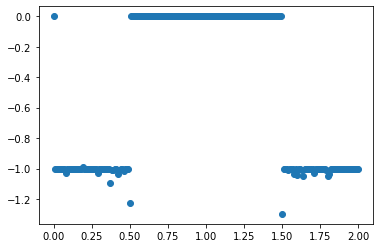

In [107]:
sym1 = 'Sigmax'
sym2 = 'upperSigmaz'

sym_list_1 = sym_U_dict[sym1]
sym_list_2 = sym_U_dict[sym2]

commutator_list = []
for J in range(len(J_list)):
    if sym_list_1[J] == 0 or sym_list_2[J] == 0:
        commutator_list.append(0)
    else:
#         print(sym_list_1[J])
        chi = sym_list_1[J][1]
        U1 = sym_list_1[J][0]
        U2 = sym_list_2[J][0]
        U12 = npc.tensordot(U1, U2, axes=([1], [0]))
        U21 = npc.tensordot(U2, U1, axes=([1], [0]))
        commutator_list.append(npc.inner(U12, U21.conj()) / chi)
plt.plot(Jx_list, commutator_list, 'o')

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


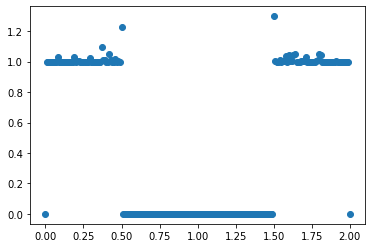

In [109]:
sym1 = 'upperSigmaz'
sym2 = 'Sigmay'

sym_list_1 = sym_U_dict[sym1]
sym_list_2 = sym_U_dict[sym2]

commutator_list = []
for J in range(len(J_list)):
    if sym_list_1[J] == 0 or sym_list_2[J] == 0:
        commutator_list.append(0)
    else:
#         print(sym_list_1[J])
        chi = sym_list_1[J][1]
        U1 = sym_list_1[J][0]
        U2 = sym_list_2[J][0]
        U12 = npc.tensordot(U1, U2, axes=([1], [0]))
        U21 = npc.tensordot(U2, U1, axes=([1], [0]))
        commutator_list.append(npc.inner(U12, U21.conj()) / chi)
plt.plot(Jx_list, commutator_list, 'o')

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


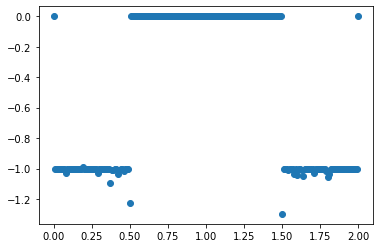

In [110]:
sym1 = 'lowerSigmaz'
sym2 = 'Sigmay'

sym_list_1 = sym_U_dict[sym1]
sym_list_2 = sym_U_dict[sym2]

commutator_list = []
for J in range(len(J_list)):
    if sym_list_1[J] == 0 or sym_list_2[J] == 0:
        commutator_list.append(0)
    else:
#         print(sym_list_1[J])
        chi = sym_list_1[J][1]
        U1 = sym_list_1[J][0]
        U2 = sym_list_2[J][0]
        U12 = npc.tensordot(U1, U2, axes=([1], [0]))
        U21 = npc.tensordot(U2, U1, axes=([1], [0]))
        commutator_list.append(npc.inner(U12, U21.conj()) / chi)
plt.plot(Jx_list, commutator_list, 'o')

In [114]:
psi = psi_dict[(1.75, 0.25, 1.0)].copy()
psi.finite

False

# SPT Detectors of Spatial Inversion

In [60]:
Jx_list = linspace(0, 2.0, 201)
J_list = [(Jx, np.round(2-Jx, decimals=2), 1.0) for Jx in Jx_list]
    
detector_list_spatial_inv = [np.real(detect_SPT_spatial_inv(psi_dict[J])) for J in J_list]

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

Text(0.5, 1.0, 'SPT Detector on the line $J_x + J_y = 2 J_z, Z_{upper, lower}$')

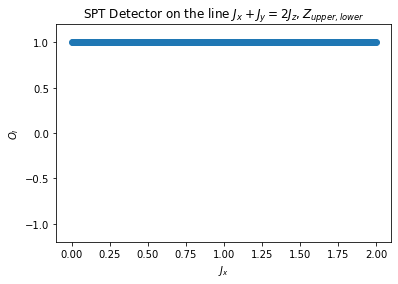

In [61]:
plt.plot(Jx_list, detector_list_spatial_inv, 'o')
plt.ylim(-1.2, 1.2)
plt.xlabel(r'$J_x$')
plt.ylabel(r'$O_{I}$')
plt.title(r'SPT Detector on the line $J_x + J_y = 2 J_z, Space Inversion$')

# SPT Detectors of Time Reversal

In [72]:
Jx_list = linspace(0, 2.0, 201)
J_list = [(Jx, np.round(2-Jx, decimals=2), 1.0) for Jx in Jx_list]
    
detector_list_time_rev = [np.real(detect_SPT_spatial_inv(psi_dict[J], Op='time_reversal')) for J in J_list]

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

Text(0.5, 1.0, 'SPT Detector on the line $J_x + J_y = 2 J_z, Time Reversal$')

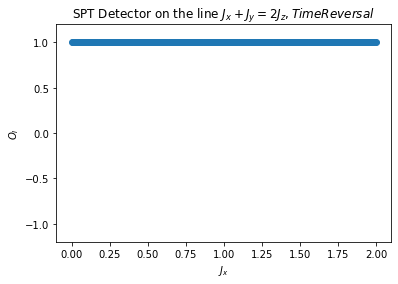

In [74]:
plt.plot(Jx_list, detector_list_time_rev, 'o')
plt.ylim(-1.2, 1.2)
plt.xlabel(r'$J_x$')
plt.ylabel(r'$O_{I}$')
plt.title(r'SPT Detector on the line $J_x + J_y = 2 J_z, Time Reversal$')

Let's have a look at some other symmetries.

First of all, the global `Z` will be automatically symmetrized since it's simply the product of `X` and `Y`.

Then we still have to consider the upper `Z` and lower `Z`; similarly, we only need to consider one of them.
Say, 
$$\Sigma^z_{upper} = \prod_{n=1}^{N} \sigma^z_{4k+1} \sigma^z_{4k+4}$$

# Translational Invariance Checking

In [85]:
def check_TI(psi, d=2):
    psi_copy = psi.copy()
    tm = TransferMatrix(psi_copy, psi_copy, shift_bra=d, shift_ket=0)
    tm_eigs = tm.eigenvectors(num_ev=2)[0] # get the first two eigenvalues
    return tm_eigs

In [ ]:
Jx_list = linspace(0, 2.0, 201)
J_list = [(Jx, np.round(2-Jx, decimals=2), 1.0) for Jx in Jx_list]
psi_list = [psi_dict[J].copy() for J in J_list]

for psi in psi_list:
    assert psi.L == 4
largest_eig_list = [np.abs(check_TI(psi)[0]) for psi in psi_list]
second_eig_list = [np.abs(check_TI(psi)[1]) for psi in psi_list]

In [86]:
four_shifted_list = [np.abs(check_TI(psi, d=4)[0]) for psi in psi_list]

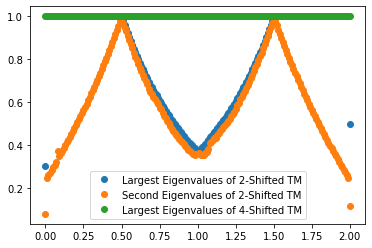

In [87]:
plt.plot(Jx_list, largest_eig_list, 'o', label='Largest Eigenvalues of 2-Shifted TM')
plt.plot(Jx_list, second_eig_list, 'o', label='Second Eigenvalues of 2-Shifted TM')
plt.plot(Jx_list, four_shifted_list, 'o', label='Largest Eigenvalues of 4-Shifted TM')
plt.legend()
plt.show()
# detector_list_time_rev = [np.real(detect_SPT_spatial_inv(psi_dict[J], Op='time_reversal')) for J in J_list]

In [57]:
global_list = []
upper_list = []
lower_list = []
global_X_list = []
global_Y_list = []
Jx_list = []

for J, psi in psi_dict.items():
    Jx_list.append(J[0])
    psi_copy = psi.copy()
    M = psi.L
    assert M%4==0
    N = M // 4 # extract the total number of unitcells
    
    for n in range(N): # loop over each unicell
        i = 4*n
        psi_copy.apply_local_op(i, 'Sigmaz')
        i = 4*n+3
        psi_copy.apply_local_op(i, 'Sigmaz')
        pass
    
    upper_list.append(np.abs(psi.overlap(psi_copy)))
    
    
    psi_copy = psi.copy()
    for n in range(N):
        i = 4*n+1
        psi_copy.apply_local_op(i, 'Sigmaz')
        i = 4*n+2
        psi_copy.apply_local_op(i, 'Sigmaz')
        pass
    
    lower_list.append(np.abs(psi.overlap(psi_copy)))
    
    
    psi_copy = psi.copy()
    for n in range(4*N):
        psi_copy.apply_local_op(n, 'Sigmaz')
        pass
    
    global_list.append(np.abs(psi.overlap(psi_copy)))
    
    
    psi_copy = psi.copy()
    for n in range(4*N):
        psi_copy.apply_local_op(n, 'Sigmax')
        pass
    
    global_X_list.append(np.abs(psi.overlap(psi_copy)))
    
    
    psi_copy = psi.copy()
    for n in range(4*N):
        psi_copy.apply_local_op(n, 'Sigmay')
        pass
    
    global_Y_list.append(np.abs(psi.overlap(psi_copy)))

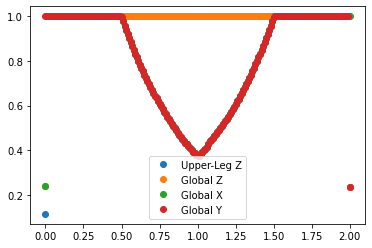

In [62]:
plt.plot(Jx_list[1:], upper_list[1:], 'o', label='Upper-Leg Z')
# plt.plot(Jx_list, lower_list, 'o', label='Lower-Leg Z')
plt.plot(Jx_list[1:], global_list[1:], 'o', label='Global Z')
plt.plot(Jx_list[1:], global_X_list[1:], 'o', label='Global X')
plt.plot(Jx_list[1:], global_Y_list[1:], 'o', label='Global Y')
plt.legend()

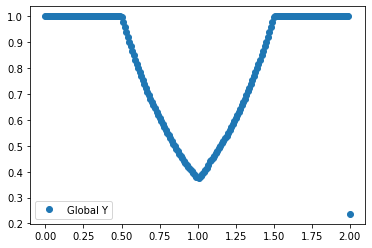

In [63]:
plt.plot(Jx_list[1:], global_Y_list[1:], 'o', label='Global Y')
plt.legend()

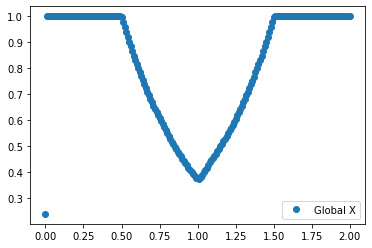

In [64]:
plt.plot(Jx_list[1:], global_X_list[1:], 'o', label='Global X')
plt.legend()

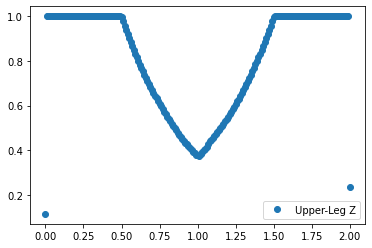

In [65]:
plt.plot(Jx_list[1:], upper_list[1:], 'o', label='Upper-Leg Z')
plt.legend()

The initial point 111 seems to be wrong and considering the fact that it is the first point we need to redo its simulation.

In [48]:
chi_list = [4, 8, 16, 32, 64, 128]

Jx = 1.0
Jy = 1.0
Jz = 1.0
L = 2
chi = 64

psi_list = []
result_list = []

initial_psi = None
for chi in chi_list:
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
    psi = result['psi'].copy()
    psi_list.append(psi)
    initial_psi = psi.copy()

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  4 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True f

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8388027275038041, S = nan, norm_err = 6.5e-07
Current memory usage 327.6 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4532e-07, max_E_trunc = 2.8254e-06
MPS bond dimensions: [8, 8, 8, 8]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8388029009164057, S = nan, norm_err = 1.1e-07
Current memory usage 327.6 MB, time elapsed: 3.4 s
Delta E = -1.7341e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5350e-07, max_E_trunc = 2.8068e-06
MPS bond dimensions: [8, 8, 8, 8]
Convergence criterium reached with enabled 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8388049833879485, S = nan, norm_err = 1.6e-09
Current memory usage 327.6 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3535e-10, max_E_trunc = 2.1083e-09
MPS bond dimensions: [16, 16, 16, 16]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8388049847890713, S = nan, norm_err = 4.1e-10
Current memory usage 327.6 MB, time elapsed: 4.2 s
Delta E = -1.4011e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3205e-10, max_E_trunc = 2.0256e-09
MPS bond dimensions: [16, 16, 16, 16]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8388049859311444, S = nan, norm_err = 6.1e-13
Current memory usage 327.6 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.2947e-18, max_E_trunc = 8.5265e-14
MPS bond dimensions: [54, 57, 33, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8388049859312261, S = nan, norm_err = 5.7e-13
Current memory usage 327.6 MB, time elapsed: 7.1 s
Delta E = -8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0529e-18, max_E_trunc = 2.2737e-13
MPS bond dimensions: [46, 56, 35, 57]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8388049859311160, S = nan, norm_err = 6.9e-13
Current memory usage 327.6 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2023e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [52, 58, 35, 59]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8388049859312190, S = nan, norm_err = 6.3e-13
Current memory usage 327.6 MB, time elapsed: 8.7 s
Delta E = -1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1920e-19, max_E_trunc = -1.7053e-13
MPS bond dimensions: [47, 56, 35, 58]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


In [49]:
psi_copy = psi.copy()
for i in range(psi.L):
    psi_copy.apply_local_op(i, 'Sigmaz')
    
np.abs(psi.overlap(psi_copy))

1.0000000000000064

In [50]:
psi_copy = psi.copy()
for i in range(psi.L // 4):
    psi_copy.apply_local_op(4*i, 'Sigmaz')
    psi_copy.apply_local_op(4*i+3, 'Sigmaz')
    
np.abs(psi.overlap(psi_copy))

0.37190462246877415

In [98]:
for x in x_list:
    x = float(x)
    
for y in y_list:
    y = float(y)
    
for z in z_list:
    z = float(z)

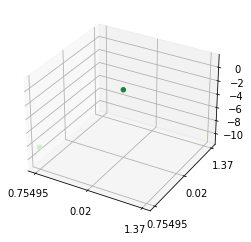

In [101]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x_list, y_list, z_list, c=z_list, cmap='Greens')

In [108]:
from kitaev_ladder_snake1 import run_atomic

In [120]:
Jx_list = linspace(1.0, 2.0, 11)

Jz = 1.0
L = 2
chi = 64

psi_list = []
result_list = []

initial_psi = None
for Jx in Jx_list:
    Jy = np.round(2 - Jx, decimals=2)
#     print(Jy)
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
    psi = result['psi'].copy()
    psi_list.append(psi)
    initial_psi = psi.copy()
    result_list.append(detect_SPT_D2(psi))

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996-6.938893903907228e-17j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.1 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.9 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8400658916211938, S = nan, norm_err = 4.3e-13
Current memory usage 342.8 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8248e-18, max_E_trunc = 1.1369e-13
MPS bond dimensions: [51, 58, 34, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8400658916212365, S = nan, norm_err = 3.3e-13
Current memory usage 342.8 MB, time elapsed: 5.9 s
Delta E = -4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5736e-18, max_E_trunc = 3.9790e-13
MPS bond dimensions: [47, 55, 33, 56]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 40, 28, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987-1.3877787807814457e-17j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.2 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.8 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swee

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8439663883084556, S = nan, norm_err = 9.3e-12
Current memory usage 342.8 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7327e-17, max_E_trunc = 2.2737e-13
MPS bond dimensions: [56, 64, 43, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8439663883084521, S = nan, norm_err = 1.6e-12
Current memory usage 342.8 MB, time elapsed: 7.4 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8189e-17, max_E_trunc = 4.5475e-13
MPS bond dimensions: [52, 64, 37, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999984+3.599600057667046e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.3 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.7 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8509040344471295, S = nan, norm_err = 4.7e-09
Current memory usage 342.8 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5393e-16, max_E_trunc = 1.9895e-13
MPS bond dimensions: [64, 64, 43, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8509040344471757, S = nan, norm_err = 4.2e-13
Current memory usage 342.8 MB, time elapsed: 6.8 s
Delta E = -4.6185e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3963e-16, max_E_trunc = 4.8317e-13
MPS bond dimensions: [59, 64, 44, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001-3.334615456761526e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.4 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.6 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8617441953762963, S = nan, norm_err = 2.9e-06
Current memory usage 342.8 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9972e-16, max_E_trunc = 1.1369e-13
MPS bond dimensions: [64, 64, 46, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8617441955757670, S = nan, norm_err = 3.2e-09
Current memory usage 342.8 MB, time elapsed: 7.1 s
Delta E = -1.9947e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4166e-15, max_E_trunc = 4.2633e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989-7.025304024636299e-17j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.5 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweep

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8786254625676051, S = nan, norm_err = 1.5e-03
Current memory usage 342.8 MB, time elapsed: 4.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2893e-14, max_E_trunc = 1.0232e-12
MPS bond dimensions: [64, 64, 55, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8786388365559858, S = nan, norm_err = 9.1e-04
Current memory usage 342.8 MB, time elapsed: 10.7 s
Delta E = -1.3374e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6710e-12, max_E_trunc = 9.2086e-12
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep

norm_tol=1.00e-05 not reached, norm_err=1.01e-04
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.64e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 2684, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-4.810605039318183e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.6 for config KitaevLadderSnakeCompactModel


/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9060804016843349, S = nan, norm_err = 1.7e-04
Current memory usage 342.8 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8465e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 57, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9060804337593993, S = nan, norm_err = 7.6e-06
Current memory usage 342.8 MB, time elapsed: 8.2 s
Delta E = -3.2075e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4445e-14, max_E_trunc = 6.8212e-13
MPS bond dimensions: [64, 64, 58, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-4.07394510453941e-16j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.7 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9400028937027756, S = nan, norm_err = 9.0e-11
Current memory usage 342.8 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4915e-16, max_E_trunc = 8.5265e-14
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9400028937027258, S = nan, norm_err = 7.9e-13
Current memory usage 342.8 MB, time elapsed: 6.8 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0927e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 45, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016-7.308537974461399e-17j)
After the canonicalization:
Bond dim =  [38, 44, 38, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.8 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.2 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9781997801631661, S = nan, norm_err = 2.4e-12
Current memory usage 342.8 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4406e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [49, 54, 38, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9781997801630666, S = nan, norm_err = 1.8e-13
Current memory usage 342.8 MB, time elapsed: 7.3 s
Delta E = 9.9476e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4093e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [48, 49, 35, 59]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999993+1.3408629295495507e-16j)
After the canonicalization:
Bond dim =  [28, 34, 28, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0196051343590540, S = nan, norm_err = 4.9e-13
Current memory usage 342.8 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9745e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [41, 41, 26, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0196051343591037, S = nan, norm_err = 4.0e-13
Current memory usage 342.8 MB, time elapsed: 6.8 s
Delta E = -4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3056e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [39, 40, 30, 41]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000089+1.6584848780594787e-16j)
After the canonicalization:
Bond dim =  [20, 26, 20, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0635444099734102, S = nan, norm_err = 6.9e-14
Current memory usage 342.8 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9894e-20, max_E_trunc = 3.1264e-13
MPS bond dimensions: [17, 12, 15, 14]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0635444099734883, S = nan, norm_err = 5.3e-15
Current memory usage 342.8 MB, time elapsed: 4.9 s
Delta E = -7.8160e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2557e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [15, 11, 17, 12]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


In [139]:
result_list = [np.real(detect_SPT_D2(psi)) for psi in psi_list]

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

Text(0.5, 1.0, 'SPT Detection $O_{D_2}:= \\frac{1}{\\chi} tr(U_x U_y U_x^\\dagger U_y^\\dagger), J_x+J_y = 2J_z$')

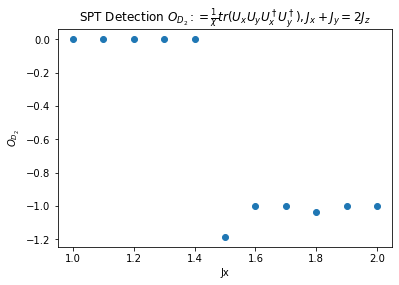

In [148]:
plt.plot(Jx_list, result_list, 'o')
plt.xlabel('Jx')
plt.ylabel(r'$O_{D_2}$')
plt.title(r'SPT Detection $O_{D_2}:= \frac{1}{\chi} tr(U_x U_y U_x^\dagger U_y^\dagger), J_x+J_y = 2J_z$')

In [130]:
psi0 = psi_list[1]

In [131]:
psi = psi0

op_list = ['Sigmax', 'Sigmay']
U_list = []

for op in op_list:
    # First of all, save a copy of the input wavefunction psi
    psi_copy = psi.copy()
    for i in range(psi_copy.L):
        psi_copy.apply_local_op(i, op)

    TM = TransferMatrix(psi, psi_copy)
    eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
    print(eta)
    print(np.abs(eta))

    U = G[0]
    Uop = U.split_legs()
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    U_list.append(Uop)

U1 = U_list[0]
U2 = U_list[1]
U12 = npc.tensordot(U1, U2, axes=([1], [0]))
U21 = npc.tensordot(U2, U1, axes=([1], [0]))

print(npc.inner(U12, U21.conj()) / chi)

[0.45458308-4.37791096e-17j]
[0.45458308]
[0.45458308+8.61609273e-16j]
[0.45458308]
(-9.976148222050618+2.0301221021717147e-15j)


/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


In [155]:
def get_detector_list(chi=128, num=101):
    Jx_list = linspace(1.0, 2.0, num)

    Jz = 1.0
    L = 2
#     chi = 128

    psi_list = []
    result_list = []

    initial_psi = None
    for Jx in Jx_list:
        Jy = np.round(2 - Jx, decimals=2)
    #     print(Jy)
        result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, initial_psi=initial_psi, bc='periodic', bc_MPS='infinite')
        psi = result['psi'].copy()
        psi_list.append(psi)
        initial_psi = psi.copy()
        result_list.append(detect_SPT_D2(psi))
    return (Jx_list, result_list)

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [34, 35, 30, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.0004858254618897833+4.404571325722362e-20j)
After the canonicalization:
Bond dim =  [34, 35, 30, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.01 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.99 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000078-5.225346251611779e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.02 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.98 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004+5.778797579347739e-17j)
After the canonicalization:
Bond dim =  [27, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.03 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.97 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024-5.898059818321144e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.04 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.96 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000006+6.083560033769836e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.05 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.95 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996+2.946861504815601e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 39]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.06 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.94 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999949+8.998878031629687e-18j)
After the canonicalization:
Bond dim =  [28, 39, 29, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.07 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.93 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016-2.255140518769849e-16j)
After the canonicalization:
Bond dim =  [28, 41, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.08 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.92 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000084+5.4014364604120673e-17j)
After the canonicalization:
Bond dim =  [28, 41, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.09 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.91 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049-6.519130845027599e-17j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.1 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.9 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-2.7449404968932006e-16j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.11 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.89 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018+6.519932565020897e-16j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.12 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.88 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999951+3.232947337700078e-16j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.13 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.87 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999993-3.386877783208571e-18j)
After the canonicalization:
Bond dim =  [29, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.14 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.86 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+3.2959746043559335e-16j)
After the canonicalization:
Bond dim =  [29, 40, 28, 39]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.15 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.85 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998+2.4136324269508476e-16j)
After the canonicalization:
Bond dim =  [29, 39, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.16 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.84 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003-1.1663552238874998e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.17 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.83 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000005-1.232941852855074e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.18 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.82 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+8.941903319962137e-17j)
After the canonicalization:
Bond dim =  [29, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.19 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.81 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1+1.5034231964533402e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.2 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.8 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000053-1.5044479243397832e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.21 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.79 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029+2.2757025744366924e-17j)
After the canonicalization:
Bond dim =  [28, 39, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.22 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.78 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000069+3.1715168563627916e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.23 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.77 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 41, 30, 41]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-1.0288564275982552e-17j)
After the canonicalization:
Bond dim =  [31, 41, 30, 41]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.24 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.76 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029+2.913655530264742e-16j)
After the canonicalization:
Bond dim =  [32, 40, 31, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.25 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.75 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-1.0828247637371903e-16j)
After the canonicalization:
Bond dim =  [33, 40, 31, 40]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.26 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.74 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042+1.3183898417423734e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 45]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.27 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.73 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000036+4.790412826987726e-17j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.28 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.72 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [33, 46, 33, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964+2.2703049127362458e-17j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.29 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.71 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [33, 46, 33, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999991+1.4978984951932145e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.3 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.7 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000073-1.8309456784824812e-17j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.31 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.69 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-1.7633540626330558e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.32 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.68 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-2.9422850193658127e-17j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.33 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.67 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1-1.0049373816829998e-16j)
After the canonicalization:
Bond dim =  [36, 46, 36, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.34 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.66 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
R

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000007-2.1268513915261114e-16j)
After the canonicalization:
Bond dim =  [38, 46, 38, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.35 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.65 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000069+7.05140764381373e-17j)
After the canonicalization:
Bond dim =  [38, 46, 38, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.36 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.64 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000033+4.3202468320576606e-16j)
After the canonicalization:
Bond dim =  [38, 49, 38, 47]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.37 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.63 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999916-2.3447303829639363e-17j)
After the canonicalization:
Bond dim =  [38, 54, 38, 55]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.38 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.62 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 60, 40, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+1.9676343836863943e-16j)
After the canonicalization:
Bond dim =  [40, 60, 40, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.39 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.61 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999986+2.498001805406602e-16j)
After the canonicalization:
Bond dim =  [43, 60, 42, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.4 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.6 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000038+4.103155849965234e-17j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.41 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.59 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000008+3.2771101383730084e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.42 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.58 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [47, 60, 46, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-1.0083372673207805e-16j)
After the canonicalization:
Bond dim =  [47, 60, 46, 59]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.43 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.57 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999984-9.578978699198813e-17j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.44 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.56 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [52, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+9.71445146547012e-17j)
After the canonicalization:
Bond dim =  [52, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.45 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.55 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [53, 64, 53, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999913-1.2662677386094563e-16j)
After the canonicalization:
Bond dim =  [53, 64, 53, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.46 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.54 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [58, 64, 58, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+4.85722573273506e-17j)
After the canonicalization:
Bond dim =  [58, 64, 58, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.47 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.53 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [61, 64, 61, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+1.734723475976807e-17j)
After the canonicalization:
Bond dim =  [61, 64, 61, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.48 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.52 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+2.7712207528729493e-16j)
After the canonicalization:
Bond dim =  [62, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.49 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.51 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
DMRG finished after 50 sweeps.
total size = 724, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-1.8302429843919805e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.5 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<

Updating environment
.....
sweep 170, age = 2124
Energy = -0.8786452989438089, S = 0.9655656789849156, norm_err = 1.2e-04
Current memory usage 381.4 MB, time elapsed: 47.5 s
Delta E = -1.3303e-09, Delta S = 4.4627e-04 (per sweep)
max_trunc_err = 2.8346e-10, max_E_trunc = 3.1846e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 2244
Energy = -0.8786453108303363, S = 0.9698992826302061, norm_err = 1.1e-04
Current memory usage 381.4 MB, time elapsed: 49.5 s
Delta E = -1.1887e-09, Delta S = 4.3336e-04 (per sweep)
max_trunc_err = 3.0563e-10, max_E_trunc = 3.3458e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 190, age = 2364
Energy = -0.8786453208152807, S = 0.9740415840398878, norm_err = 1.0e-04
Current memory usage 381.4 MB, time elapsed: 51.3 s
Delta E = -9.9849e-10, Delta S = 4.1423e-04 (per sweep)
max_trunc_err = 2.8453e-10, max_E_trunc = 2.7123e-09
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 200,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.30e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 2684, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999986+3.2240036457587594e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.51 for config KitaevLadderSnakeCompactMode

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8809249441739979, S = nan, norm_err = 1.5e-03
Current memory usage 381.4 MB, time elapsed: 4.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8506e-12, max_E_trunc = 1.2221e-11
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8809330225627434, S = nan, norm_err = 2.0e-03
Current memory usage 381.4 MB, time elapsed: 10.2 s
Delta E = -8.0784e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6793e-11, max_E_trunc = 8.8903e-11
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.91e-04
Call psi.canonical_form()
DMRG finished after 100 sweeps.
total size = 1484, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-1.0605875556605446e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.52 for config KitaevLadderSnakeCompactModel

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8833779542636080, S = nan, norm_err = 2.5e-04
Current memory usage 381.4 MB, time elapsed: 4.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0364e-12, max_E_trunc = 1.3387e-11
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8833786288837615, S = nan, norm_err = 4.6e-05
Current memory usage 381.4 MB, time elapsed: 9.2 s
Delta E = -6.7462e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4465e-11, max_E_trunc = 8.1997e-11
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.61e-05
Call psi.canonical_form()
DMRG finished after 40 sweeps.
total size = 764, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005-8.091971435533083e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.53 for config KitaevLadderSnakeCompactModel
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8859229544920062, S = nan, norm_err = 1.3e-04
Current memory usage 381.4 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0507e-12, max_E_trunc = 7.0202e-12
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8859231604989262, S = nan, norm_err = 1.1e-05
Current memory usage 381.4 MB, time elapsed: 8.1 s
Delta E = -2.0601e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3369e-12, max_E_trunc = 2.7200e-11
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


...
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 40 sweeps.
total size = 764, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-1.3577387101642393e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.54 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.46 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel




/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8885651969703012, S = nan, norm_err = 6.3e-05
Current memory usage 381.4 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9505e-13, max_E_trunc = 3.8654e-12
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8885652542891620, S = nan, norm_err = 2.8e-06
Current memory usage 381.4 MB, time elapsed: 7.8 s
Delta E = -5.7319e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3630e-12, max_E_trunc = 1.1397e-11
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8912960174741507, S = nan, norm_err = 3.0e-05
Current memory usage 381.4 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4774e-13, max_E_trunc = 2.7285e-12
MPS bond dimensions: [64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8912960328820958, S = nan, norm_err = 6.9e-07
Current memory usage 381.4 MB, time elapsed: 7.5 s
Delta E = -1.5408e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0943e-12, max_E_trunc = 6.7928e-12
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999983+2.780197349621258e-16j)
After the canonicalization:
Bond dim =  [62, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.56 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.44 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swe

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8941086946479260, S = nan, norm_err = 1.4e-05
Current memory usage 381.4 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0460e-13, max_E_trunc = 2.0464e-12
MPS bond dimensions: [64, 64, 61, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8941086987253897, S = nan, norm_err = 1.7e-07
Current memory usage 381.4 MB, time elapsed: 7.4 s
Delta E = -4.0775e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9668e-13, max_E_trunc = 2.6716e-12
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+1.389529536988811e-16j)
After the canonicalization:
Bond dim =  [62, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.57 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.43 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swe

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8969977583056234, S = nan, norm_err = 6.9e-06
Current memory usage 381.4 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1858e-13, max_E_trunc = 8.5265e-13
MPS bond dimensions: [64, 64, 59, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8969977593715086, S = nan, norm_err = 4.2e-08
Current memory usage 381.4 MB, time elapsed: 7.1 s
Delta E = -1.0659e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3875e-13, max_E_trunc = 1.5916e-12
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [58, 64, 58, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-6.251683581395364e-17j)
After the canonicalization:
Bond dim =  [58, 64, 58, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.58 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.42 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swe

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8999586165783811, S = nan, norm_err = 3.3e-06
Current memory usage 381.4 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1668e-14, max_E_trunc = 5.4001e-13
MPS bond dimensions: [64, 64, 55, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8999586168536311, S = nan, norm_err = 1.0e-08
Current memory usage 381.4 MB, time elapsed: 7.0 s
Delta E = -2.7525e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2137e-13, max_E_trunc = 1.0800e-12
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [52, 64, 53, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-5.0283590818188875e-17j)
After the canonicalization:
Bond dim =  [52, 64, 53, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.59 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.41 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swe

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9029873248866522, S = nan, norm_err = 1.5e-06
Current memory usage 381.4 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2276e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 55, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9029873249585236, S = nan, norm_err = 2.6e-09
Current memory usage 381.4 MB, time elapsed: 7.0 s
Delta E = -7.1871e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3989e-14, max_E_trunc = 7.3896e-13
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033-8.542631905584646e-17j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.6 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.4 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweep

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9060804338076274, S = nan, norm_err = 7.2e-07
Current memory usage 381.4 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3829e-14, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 57, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9060804338258635, S = nan, norm_err = 6.4e-10
Current memory usage 381.4 MB, time elapsed: 6.9 s
Delta E = -1.8236e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4840e-14, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+4.3784804542948207e-17j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.61 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.39 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9092348843872848, S = nan, norm_err = 3.4e-07
Current memory usage 381.4 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4896e-14, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 54, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9092348843917648, S = nan, norm_err = 1.6e-10
Current memory usage 381.4 MB, time elapsed: 6.8 s
Delta E = -4.4800e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9155e-14, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 59, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999971+9.201631552890613e-17j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.62 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.38 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9124479333713182, S = nan, norm_err = 1.6e-07
Current memory usage 381.4 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9803e-15, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 53, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9124479333723627, S = nan, norm_err = 3.8e-11
Current memory usage 381.4 MB, time elapsed: 6.8 s
Delta E = -1.0445e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1137e-14, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 59, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-3.2741576645665146e-16j)
After the canonicalization:
Bond dim =  [49, 63, 50, 63]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.63 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.37 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9157170980162164, S = nan, norm_err = 7.5e-08
Current memory usage 381.4 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3799e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 54, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9157170980166214, S = nan, norm_err = 1.4e-11
Current memory usage 381.4 MB, time elapsed: 6.8 s
Delta E = -4.0501e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2957e-15, max_E_trunc = 2.5580e-13
MPS bond dimensions: [64, 64, 56, 64]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024+1.7640333897152068e-16j)
After the canonicalization:
Bond dim =  [48, 61, 45, 59]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.64 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.36 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9190401142282170, S = nan, norm_err = 3.5e-08
Current memory usage 381.4 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4914e-15, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 51, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9190401142282383, S = nan, norm_err = 5.0e-12
Current memory usage 381.4 MB, time elapsed: 6.7 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2752e-15, max_E_trunc = 2.5580e-13
MPS bond dimensions: [64, 64, 57, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+7.646449783132951e-17j)
After the canonicalization:
Bond dim =  [38, 52, 39, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.65 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.35 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9224149040543992, S = nan, norm_err = 1.6e-08
Current memory usage 381.4 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8699e-15, max_E_trunc = 2.8422e-14
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9224149040544631, S = nan, norm_err = 2.8e-12
Current memory usage 381.4 MB, time elapsed: 6.6 s
Delta E = -6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5907e-15, max_E_trunc = 1.1369e-13
MPS bond dimensions: [64, 64, 50, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044-1.0931451245257267e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.66 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.34 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9258395499347039, S = nan, norm_err = 7.6e-09
Current memory usage 381.4 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0065e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9258395499345724, S = nan, norm_err = 2.1e-12
Current memory usage 381.4 MB, time elapsed: 6.6 s
Delta E = 1.3145e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8959e-16, max_E_trunc = 3.1264e-13
MPS bond dimensions: [62, 64, 50, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000095-6.586254793977475e-17j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.67 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.33 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9293122739506821, S = nan, norm_err = 3.5e-09
Current memory usage 381.4 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.6222e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9293122739507282, S = nan, norm_err = 3.2e-12
Current memory usage 381.4 MB, time elapsed: 6.6 s
Delta E = -4.6185e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4044e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [62, 64, 48, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027-3.3062192103930086e-17j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.68 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.32 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9328314208594470, S = nan, norm_err = 1.6e-09
Current memory usage 381.4 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5997e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 49, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9328314208594435, S = nan, norm_err = 1.5e-12
Current memory usage 381.4 MB, time elapsed: 6.6 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5030e-16, max_E_trunc = 5.6843e-13
MPS bond dimensions: [63, 64, 50, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000069+1.3472972010365216e-16j)
After the canonicalization:
Bond dim =  [38, 49, 38, 48]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.69 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.31 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9363954440370748, S = nan, norm_err = 7.5e-10
Current memory usage 381.4 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3157e-16, max_E_trunc = 1.9895e-13
MPS bond dimensions: [63, 64, 46, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9363954440369469, S = nan, norm_err = 1.3e-12
Current memory usage 381.4 MB, time elapsed: 6.5 s
Delta E = 1.2790e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1018e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [63, 64, 49, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016+2.439562868694844e-16j)
After the canonicalization:
Bond dim =  [38, 44, 38, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.7 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9400028937027578, S = nan, norm_err = 3.4e-10
Current memory usage 381.4 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1813e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 44, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9400028937026335, S = nan, norm_err = 1.0e-12
Current memory usage 381.4 MB, time elapsed: 6.6 s
Delta E = 1.2434e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0522e-16, max_E_trunc = 5.1159e-13
MPS bond dimensions: [63, 64, 44, 64]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.00000000000001+9.202888247927331e-17j)
After the canonicalization:
Bond dim =  [38, 44, 38, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.71 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.29 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9436524069522463, S = nan, norm_err = 1.6e-10
Current memory usage 381.4 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6285e-17, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 45, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9436524069523813, S = nan, norm_err = 7.5e-13
Current memory usage 381.4 MB, time elapsed: 6.6 s
Delta E = -1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2802e-17, max_E_trunc = 2.2737e-13
MPS bond dimensions: [63, 64, 45, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001+4.851061029993474e-18j)
After the canonicalization:
Bond dim =  [35, 44, 36, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.72 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.28 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9473426992479688, S = nan, norm_err = 7.0e-11
Current memory usage 381.4 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3817e-17, max_E_trunc = 2.5580e-13
MPS bond dimensions: [63, 64, 41, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9473426992480327, S = nan, norm_err = 1.7e-12
Current memory usage 381.4 MB, time elapsed: 6.8 s
Delta E = -6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6693e-17, max_E_trunc = 1.7053e-13
MPS bond dimensions: [55, 61, 46, 64]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1-1.0226454738614112e-16j)
After the canonicalization:
Bond dim =  [28, 44, 28, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.73 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.27 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
....

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9510725570920613, S = nan, norm_err = 3.2e-11
Current memory usage 381.4 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8715e-17, max_E_trunc = 1.4211e-13
MPS bond dimensions: [56, 64, 42, 62]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9510725570920329, S = nan, norm_err = 2.1e-12
Current memory usage 381.4 MB, time elapsed: 6.8 s
Delta E = 2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0261e-17, max_E_trunc = 5.1159e-13
MPS bond dimensions: [55, 60, 41, 63]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022-1.09636777391146e-17j)
After the canonicalization:
Bond dim =  [28, 44, 28, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.74 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.26 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9548408316725023, S = nan, norm_err = 1.4e-11
Current memory usage 381.4 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3835e-17, max_E_trunc = 2.8422e-13
MPS bond dimensions: [52, 58, 34, 59]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9548408316722501, S = nan, norm_err = 2.4e-13
Current memory usage 381.4 MB, time elapsed: 6.9 s
Delta E = 2.5224e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0956e-17, max_E_trunc = 3.9790e-13
MPS bond dimensions: [48, 57, 35, 59]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022+1.1046467614770453e-16j)
After the canonicalization:
Bond dim =  [28, 42, 28, 43]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9586464333187124, S = nan, norm_err = 6.2e-12
Current memory usage 381.4 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.4833e-18, max_E_trunc = 1.7053e-13
MPS bond dimensions: [51, 59, 37, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9586464333187905, S = nan, norm_err = 1.4e-12
Current memory usage 381.4 MB, time elapsed: 7.0 s
Delta E = -7.8160e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9904e-18, max_E_trunc = -5.6843e-14
MPS bond dimensions: [53, 57, 36, 58]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+1.0802838026032508e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.76 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.24 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9624883266304671, S = nan, norm_err = 3.1e-12
Current memory usage 381.4 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8240e-18, max_E_trunc = 8.5265e-14
MPS bond dimensions: [51, 58, 35, 59]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9624883266305346, S = nan, norm_err = 2.6e-13
Current memory usage 381.4 MB, time elapsed: 7.0 s
Delta E = -6.7502e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4908e-18, max_E_trunc = 1.1369e-13
MPS bond dimensions: [46, 56, 35, 58]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999991-1.5630714760687575e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.77 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.23 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9663655261777926, S = nan, norm_err = 1.9e-12
Current memory usage 381.4 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1256e-18, max_E_trunc = 1.9895e-13
MPS bond dimensions: [53, 56, 36, 59]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9663655261776540, S = nan, norm_err = 2.5e-13
Current memory usage 381.4 MB, time elapsed: 7.1 s
Delta E = 1.3856e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8150e-18, max_E_trunc = 2.8422e-13
MPS bond dimensions: [49, 55, 37, 59]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-1.290805335661057e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.78 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.22 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swe

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9702770926832720, S = nan, norm_err = 1.2e-12
Current memory usage 381.4 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0021e-18, max_E_trunc = 5.6843e-14
MPS bond dimensions: [46, 54, 36, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9702770926832187, S = nan, norm_err = 1.8e-13
Current memory usage 381.4 MB, time elapsed: 7.1 s
Delta E = 5.3291e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2282e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [45, 50, 36, 57]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003-2.2418328601280316e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.79 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.21 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9742221296200881, S = nan, norm_err = 1.6e-12
Current memory usage 381.4 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6432e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [50, 56, 38, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9742221296200810, S = nan, norm_err = 2.6e-13
Current memory usage 381.4 MB, time elapsed: 7.2 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3024e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [46, 50, 37, 59]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999977+3.8364091234878867e-17j)
After the canonicalization:
Bond dim =  [28, 35, 28, 35]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.8 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.2 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9781997801630595, S = nan, norm_err = 4.1e-12
Current memory usage 381.4 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8874e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [54, 53, 35, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9781997801631519, S = nan, norm_err = 1.1e-13
Current memory usage 381.4 MB, time elapsed: 7.1 s
Delta E = -9.2371e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2469e-19, max_E_trunc = 4.5475e-13
MPS bond dimensions: [50, 50, 35, 57]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+4.1690663589540734e-17j)
After the canonicalization:
Bond dim =  [28, 34, 27, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.81 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.19 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9822092244490470, S = nan, norm_err = 4.7e-12
Current memory usage 381.4 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8661e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [49, 49, 36, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9822092244491145, S = nan, norm_err = 4.1e-13
Current memory usage 381.4 MB, time elapsed: 7.2 s
Delta E = -6.7502e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0229e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [49, 49, 37, 56]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999993+3.6793487789839443e-17j)
After the canonicalization:
Bond dim =  [27, 32, 25, 32]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.82 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.18 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9862496771038494, S = nan, norm_err = 3.4e-12
Current memory usage 381.4 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0112e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [47, 49, 35, 50]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9862496771041620, S = nan, norm_err = 1.5e-13
Current memory usage 381.4 MB, time elapsed: 7.3 s
Delta E = -3.1264e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2112e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [45, 48, 36, 55]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027+1.8610276771017335e-16j)
After the canonicalization:
Bond dim =  [20, 32, 20, 29]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.83 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.17 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9903203850034323, S = nan, norm_err = 6.7e-13
Current memory usage 381.4 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3208e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [45, 47, 35, 49]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9903203850034288, S = nan, norm_err = 2.1e-13
Current memory usage 381.4 MB, time elapsed: 7.0 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1302e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [45, 47, 34, 47]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982-1.4558014066459506e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.84 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.16 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9944206252389129, S = nan, norm_err = 2.3e-13
Current memory usage 381.4 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5662e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [44, 43, 27, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9944206252388881, S = nan, norm_err = 1.4e-13
Current memory usage 381.4 MB, time elapsed: 7.0 s
Delta E = 2.4869e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7805e-20, max_E_trunc = 3.9790e-13
MPS bond dimensions: [42, 43, 28, 42]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999969+2.6136985829885594e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.85 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.15 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9985497032634214, S = nan, norm_err = 5.3e-13
Current memory usage 381.4 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.1751e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [43, 42, 29, 42]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9985497032633575, S = nan, norm_err = 2.4e-13
Current memory usage 381.4 MB, time elapsed: 6.9 s
Delta E = 6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8559e-20, max_E_trunc = 3.9790e-13
MPS bond dimensions: [36, 41, 28, 40]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044-1.5696015649979346e-17j)
After the canonicalization:
Bond dim =  [20, 28, 20, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.86 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.14 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0027069511978013, S = nan, norm_err = 3.5e-13
Current memory usage 381.4 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1860e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [40, 41, 26, 42]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0027069511978866, S = nan, norm_err = 5.4e-13
Current memory usage 381.4 MB, time elapsed: 6.7 s
Delta E = -8.5265e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8745e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [36, 42, 27, 42]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000069+7.620623117760327e-17j)
After the canonicalization:
Bond dim =  [20, 27, 20, 27]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.87 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.13 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0068917262792638, S = nan, norm_err = 4.3e-13
Current memory usage 381.4 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8955e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [37, 42, 29, 42]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0068917262790791, S = nan, norm_err = 2.2e-13
Current memory usage 381.4 MB, time elapsed: 6.7 s
Delta E = 1.8474e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6237e-20, max_E_trunc = 3.9790e-13
MPS bond dimensions: [41, 41, 26, 40]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000075+5.409305728464482e-17j)
After the canonicalization:
Bond dim =  [20, 26, 20, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.88 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.12 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0111034094349947, S = nan, norm_err = 3.4e-13
Current memory usage 381.4 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2365e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [41, 41, 29, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0111034094349947, S = nan, norm_err = 1.7e-13
Current memory usage 381.4 MB, time elapsed: 6.9 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1126e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [40, 42, 28, 41]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000007-8.874575611113946e-17j)
After the canonicalization:
Bond dim =  [20, 26, 20, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.89 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.11 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0153414039705808, S = nan, norm_err = 3.6e-13
Current memory usage 381.4 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9273e-20, max_E_trunc = 3.1264e-13
MPS bond dimensions: [40, 39, 30, 42]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0153414039708224, S = nan, norm_err = 4.7e-13
Current memory usage 381.4 MB, time elapsed: 7.0 s
Delta E = -2.4158e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9955e-20, max_E_trunc = 5.1159e-13
MPS bond dimensions: [40, 40, 30, 40]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000058-1.4173998079850928e-16j)
After the canonicalization:
Bond dim =  [20, 26, 20, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.9 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.1 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0196051343590327, S = nan, norm_err = 5.9e-13
Current memory usage 381.4 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4311e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [42, 41, 29, 40]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0196051343590682, S = nan, norm_err = 4.6e-13
Current memory usage 381.4 MB, time elapsed: 6.8 s
Delta E = -3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9275e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [40, 39, 29, 40]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-6.490852843614949e-17j)
After the canonicalization:
Bond dim =  [20, 26, 20, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.91 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.09 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0238940451205210, S = nan, norm_err = 1.2e-12
Current memory usage 381.4 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5992e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [40, 41, 29, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0238940451205281, S = nan, norm_err = 8.4e-13
Current memory usage 381.4 MB, time elapsed: 6.7 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4466e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [35, 40, 28, 41]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044-1.1091160007190681e-16j)
After the canonicalization:
Bond dim =  [20, 26, 20, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.92 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.08 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0282075997857589, S = nan, norm_err = 7.1e-13
Current memory usage 381.4 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0484e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [35, 39, 30, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0282075997857092, S = nan, norm_err = 4.6e-13
Current memory usage 381.4 MB, time elapsed: 6.6 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4579e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [37, 38, 26, 40]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018-6.292618730426666e-17j)
After the canonicalization:
Bond dim =  [20, 26, 19, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.93 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.07 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0325452799326875, S = nan, norm_err = 5.1e-13
Current memory usage 381.4 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6405e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [37, 39, 26, 40]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0325452799326342, S = nan, norm_err = 5.1e-13
Current memory usage 381.4 MB, time elapsed: 6.5 s
Delta E = 5.3291e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5073e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [36, 36, 25, 36]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+1.8374419572136196e-16j)
After the canonicalization:
Bond dim =  [14, 25, 15, 25]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.94 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.06 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0369065842911098, S = nan, norm_err = 1.0e-12
Current memory usage 381.4 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8207e-20, max_E_trunc = 3.9790e-13
MPS bond dimensions: [32, 36, 26, 34]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0369065842912235, S = nan, norm_err = 1.3e-13
Current memory usage 381.4 MB, time elapsed: 6.3 s
Delta E = -1.1369e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9531e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [31, 30, 23, 33]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


The norm is:  1.0
The overlap is:  (0.9999999999999964+8.062243076679388e-17j)
After the canonicalization:
Bond dim =  [14, 22, 14, 23]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.95 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.05 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000036-7.211591050004327e-17j)
After the canonicalization:
Bond dim =  [14, 22, 14, 22]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.96 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.04 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0456981413762492, S = nan, norm_err = 4.6e-14
Current memory usage 381.4 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2650e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [25, 30, 21, 26]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0456981413762634, S = nan, norm_err = 4.1e-14
Current memory usage 381.4 MB, time elapsed: 6.1 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0440e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [24, 29, 21, 28]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000036-5.2887118987396925e-17j)
After the canonicalization:
Bond dim =  [14, 20, 14, 20]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.97 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.03 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0501274700931873, S = nan, norm_err = 1.1e-13
Current memory usage 381.4 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8841e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [26, 29, 21, 28]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0501274700932512, S = nan, norm_err = 5.6e-14
Current memory usage 381.4 MB, time elapsed: 5.8 s
Delta E = -6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6859e-20, max_E_trunc = 3.9790e-13
MPS bond dimensions: [23, 30, 25, 27]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


The norm is:  1.0
The overlap is:  (1.000000000000003+3.582247174370947e-16j)
After the canonicalization:
Bond dim =  [14, 20, 14, 20]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.98 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.02 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987-1.1267347487014016e-16j)
After the canonicalization:
Bond dim =  [14, 20, 14, 19]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


.....
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0590510249120975, S = nan, norm_err = 6.4e-14
Current memory usage 381.4 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2453e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [26, 28, 17, 26]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0590510249120939, S = nan, norm_err = 1.3e-13
Current memory usage 381.4 MB, time elapsed: 5.8 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8990e-20, max_E_trunc = 4.5475e-13
MPS bond dimensions: [24, 26, 21, 25]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


The norm is:  1.0
The overlap is:  (1.0000000000000027-2.4980152646377342e-17j)
After the canonicalization:
Bond dim =  [14, 18, 14, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'SPT Detection $O_{D_2}:= \\frac{1}{\\chi} tr(U_x U_y U_x^\\dagger U_y^\\dagger), J_x+J_y = 2J_z, \\chi_{max}=64$')

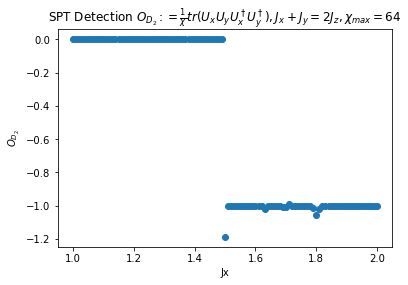

In [156]:
xs, ys = get_detector_list(chi=64)
plt.plot(xs, ys, 'o')
plt.xlabel('Jx')
plt.ylabel(r'$O_{D_2}$')
plt.title(r'SPT Detection $O_{D_2}:= \frac{1}{\chi} tr(U_x U_y U_x^\dagger U_y^\dagger), J_x+J_y = 2J_z, \chi_{max}=64$')

Text(0.5, 1.0, 'SPT Detection $O_{D_2}:= \\frac{1}{\\chi} tr(U_x U_y U_x^\\dagger U_y^\\dagger), J_x+J_y = 2J_z, \\chi_{max}=64$')

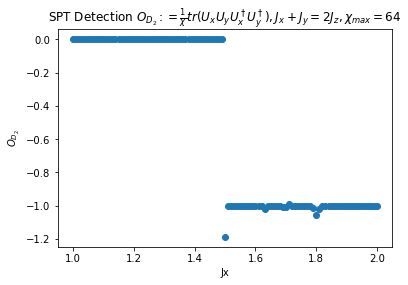

In [158]:
plt.plot(xs, ys, 'o')
plt.xlabel('Jx')
plt.ylabel(r'$O_{D_2}$')
plt.title(r'SPT Detection $O_{D_2}:= \frac{1}{\chi} tr(U_x U_y U_x^\dagger U_y^\dagger), J_x+J_y = 2J_z, \chi_{max}=64$')

/home/jerry/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'SPT Detection $O_{D_2}:= \\frac{1}{\\chi} tr(U_x U_y U_x^\\dagger U_y^\\dagger), J_x+J_y = 2J_z, \\chi_{max}=128$')

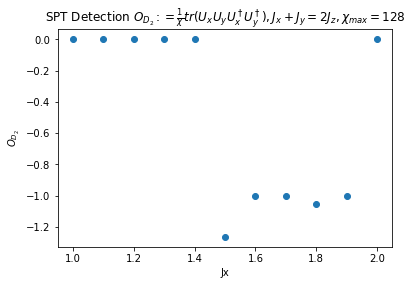

In [152]:
plt.plot(Jx_list, psi_list_128, 'o')
plt.xlabel('Jx')
plt.ylabel(r'$O_{D_2}$')
plt.title(r'SPT Detection $O_{D_2}:= \frac{1}{\chi} tr(U_x U_y U_x^\dagger U_y^\dagger), J_x+J_y = 2J_z, \chi_{max}=128$')